In [5]:
# Imports
from Code.h5Constructor import h5Constructor
import cProfile

In [6]:
gc = h5Constructor('./Dataset/CIFs/Train/', './Dataset/h5/Train/')
gc.gen_h5s(parallelize=False, device='cuda')

Save directory doesn't exist.
Created the save directory at Dataset/h5/Train

Constructing graphs from cif files:


0it [00:00, ?it/s]

In [2]:
# gc = h5Constructor('./Dataset/CIFs/Val/', './Dataset/h5/Val_pip_cuda/')
# cProfile.run('gc.gen_h5s(parallelize=False, device="cuda")', sort='tottime')


Constructing graphs from cif files:


0it [00:00, ?it/s]

         59110434 function calls (56622554 primitive calls) in 417.182 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       14  276.021   19.716  296.578   21.184 debye_calculator.py:477(_get_all)
       14   38.647    2.761   56.683    4.049 debye_calculator.py:265(iq)
     4018   33.356    0.008   33.365    0.008 {method 'to' of 'torch._C._TensorBase' objects}
       28    4.125    0.147    8.574    0.306 debye_calculator.py:147(_initialise_structures)
   259772    3.551    0.000    5.786    0.000 schema.py:1163(__init__)
   259772    2.625    0.000    9.034    0.000 schema.py:2041(_make_proxy)
     6868    2.109    0.000    2.114    0.000 {method 'fetchall' of 'sqlite3.Cursor' objects}
      140    2.021    0.014    2.021    0.014 {built-in method triu_indices}
     7272    1.957    0.000    1.959    0.000 {method 'execute' of 'sqlite3.Cursor' objects}
    64640    1.812    0.000    6.185    0.000 base.py:1352(correspo

In [3]:
# gc = h5Constructor('./Dataset/CIFs/Val/', './Dataset/h5/Val_pip_cuda/')
# cProfile.run('gc.gen_h5s(parallelize=False, device="cuda")', sort='tottime')

Save directory doesn't exist.
Created the save directory at Dataset/h5/Val_pip_cuda

Constructing graphs from cif files:


0it [00:00, ?it/s]

         61079537 function calls (57815956 primitive calls) in 647.135 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       14  369.410   26.386  402.842   28.774 debye_calculator.py:473(_get_all)
       14  142.212   10.158  173.526   12.395 debye_calculator.py:261(iq)
     4018   26.934    0.007   26.934    0.007 {method 'to' of 'torch._C._TensorBase' objects}
   812814   11.186    0.000   11.186    0.000 {built-in method sum}
   812254    8.297    0.000    8.297    0.000 {built-in method sinc}
        7    6.337    0.905   10.747    1.535 debye_calculator.py:552(generate_nanoparticles)
      420    5.578    0.013    5.590    0.013 {function Tensor.split at 0x7f858c0409e0}
       28    5.336    0.191   10.737    0.383 debye_calculator.py:143(_initialise_structures)
   259772    3.564    0.000   11.203    0.000 schema.py:2041(_make_proxy)
   259772    3.439    0.000    6.912    0.000 schema.py:1163(__init__)
      140   

In [ ]:
# gc = h5Constructor('./Dataset/CIFs/Val/', './Dataset/h5/Val_pip_cpu/')
# cProfile.run('gc.gen_h5s(parallelize=False, device="cpu")', sort='tottime')

In [1]:
from Code.datasetClass import InOrgMatDatasets

test = InOrgMatDatasets('DatasetTest', root='./Dataset/')

In [2]:
test.get(15, data_split='train')

Data(
  x=[12, 4],
  edge_index=[2, 64],
  edge_attr=[88],
  y={
    crystal_type='Flourite',
    atomic_species=[2],
    n_atomic_species=2,
    cell_params=[6],
    np_size=17.4449520111084,
    nd=[2, 3001],
    xrd=[2, 3001],
    nPDF=[2, 3001],
    xPDF=[2, 3001],
    sans=[2, 301],
    saxs=[2, 301]
  },
  pos=[12, 3],
  pos_real=[12, 3]
)

In [3]:
stats = test.get_statistics(return_dataframe=True)
stats.head()

,# of nodes,# of edges,# of elements,Crystal type,NP size (Å),Elements,Split
0,4.0,6.0,2.0,ReO3,11.691541,"[tensor(8.), tensor(27.)]",Train
1,4.0,6.0,2.0,ReO3,22.387596,"[tensor(8.), tensor(27.)]",Train
2,4.0,6.0,2.0,ReO3,32.372410,"[tensor(8.), tensor(27.)]",Train
3,4.0,6.0,2.0,ReO3,43.571796,"[tensor(8.), tensor(27.)]",Train
4,4.0,6.0,2.0,ReO3,53.577370,"[tensor(8.), tensor(27.)]",Train


In [4]:
stats.describe()

,# of nodes,# of edges,# of elements,NP size (Å)
count,200.000000,200.000000,200.0,200.000000
mean,13.125000,55.250000,2.0,33.689808
std,16.575073,79.457567,0.0,14.623227
min,3.000000,4.000000,2.0,9.680614
25%,4.000000,7.500000,2.0,22.610600
50%,7.000000,20.000000,2.0,33.424063
75%,12.000000,64.000000,2.0,43.926042
max,56.000000,256.000000,2.0,57.490219


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

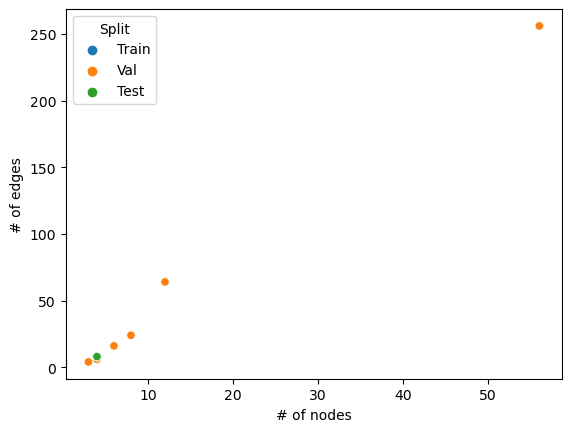

In [6]:
sns.scatterplot(data=stats, x='# of nodes', y='# of edges', hue='Split')
plt.show()

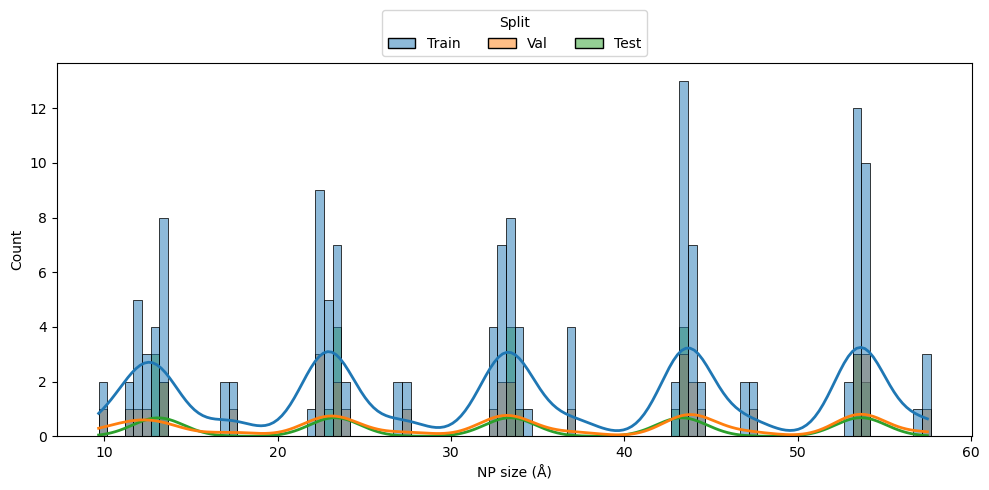

In [66]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=stats, x='NP size (Å)', binwidth=0.5, hue='Split', multiple='layer',kde=True, kde_kws=dict(bw_method=0.1), line_kws=dict(linewidth=2), stat='count')
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
plt.savefig('./test_stats_sizeDist.png', format='png', dpi=300)
plt.show()

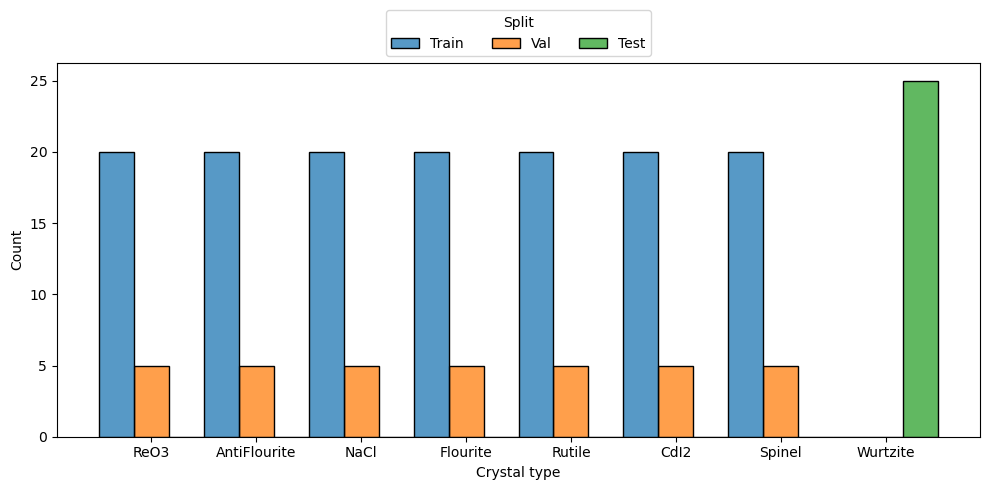

In [67]:
plt.figure(figsize=(10,5))
ax = sns.histplot(data=stats, x='Crystal type', hue='Split', multiple='dodge')
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
plt.savefig('./test_stats_crystalTypes.png', format='png', dpi=300)
plt.show()

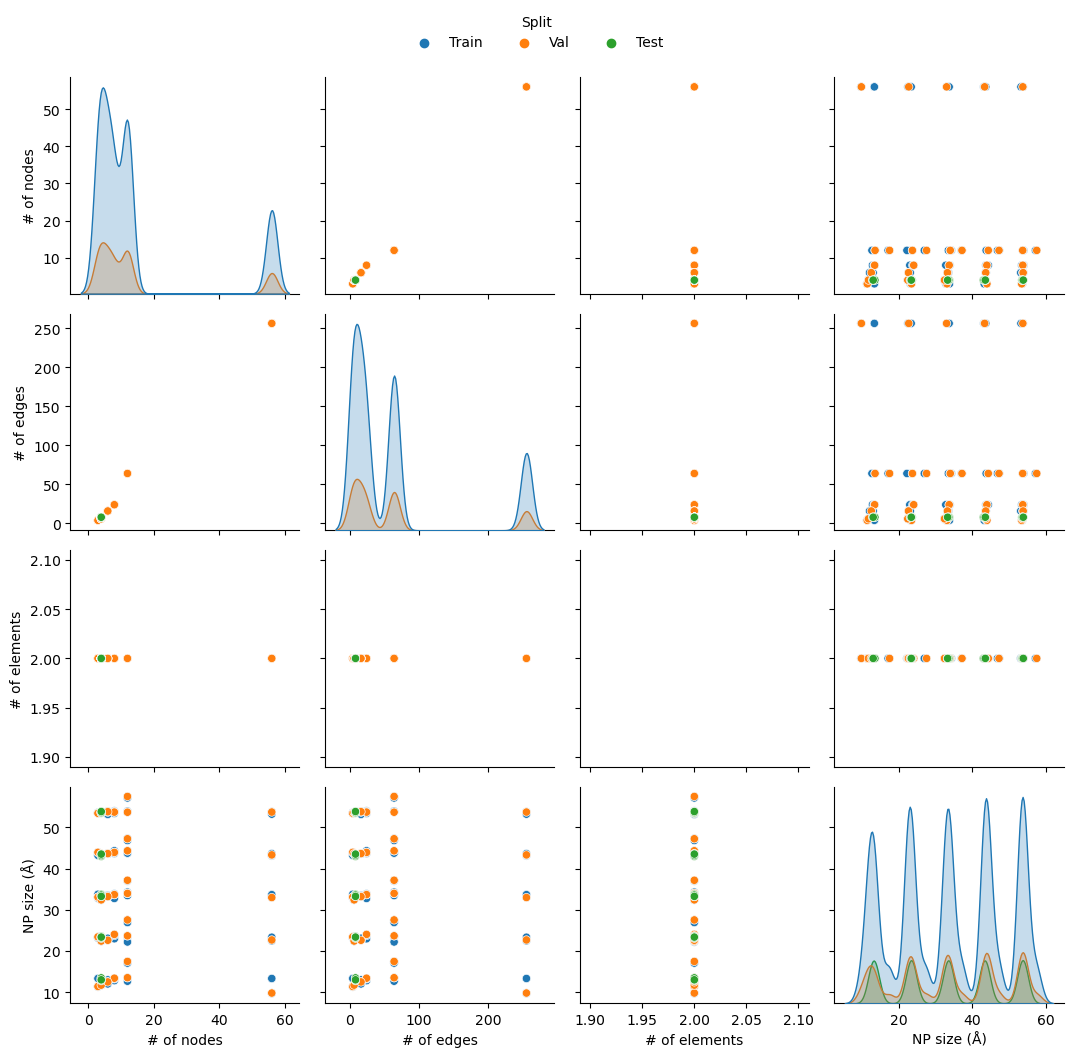

In [68]:
ax = sns.pairplot(data=stats, hue='Split', diag_kws=dict(bw_method=0.1))
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
plt.savefig('./test_stats_pairplot.png', format='png', dpi=300)
plt.show()

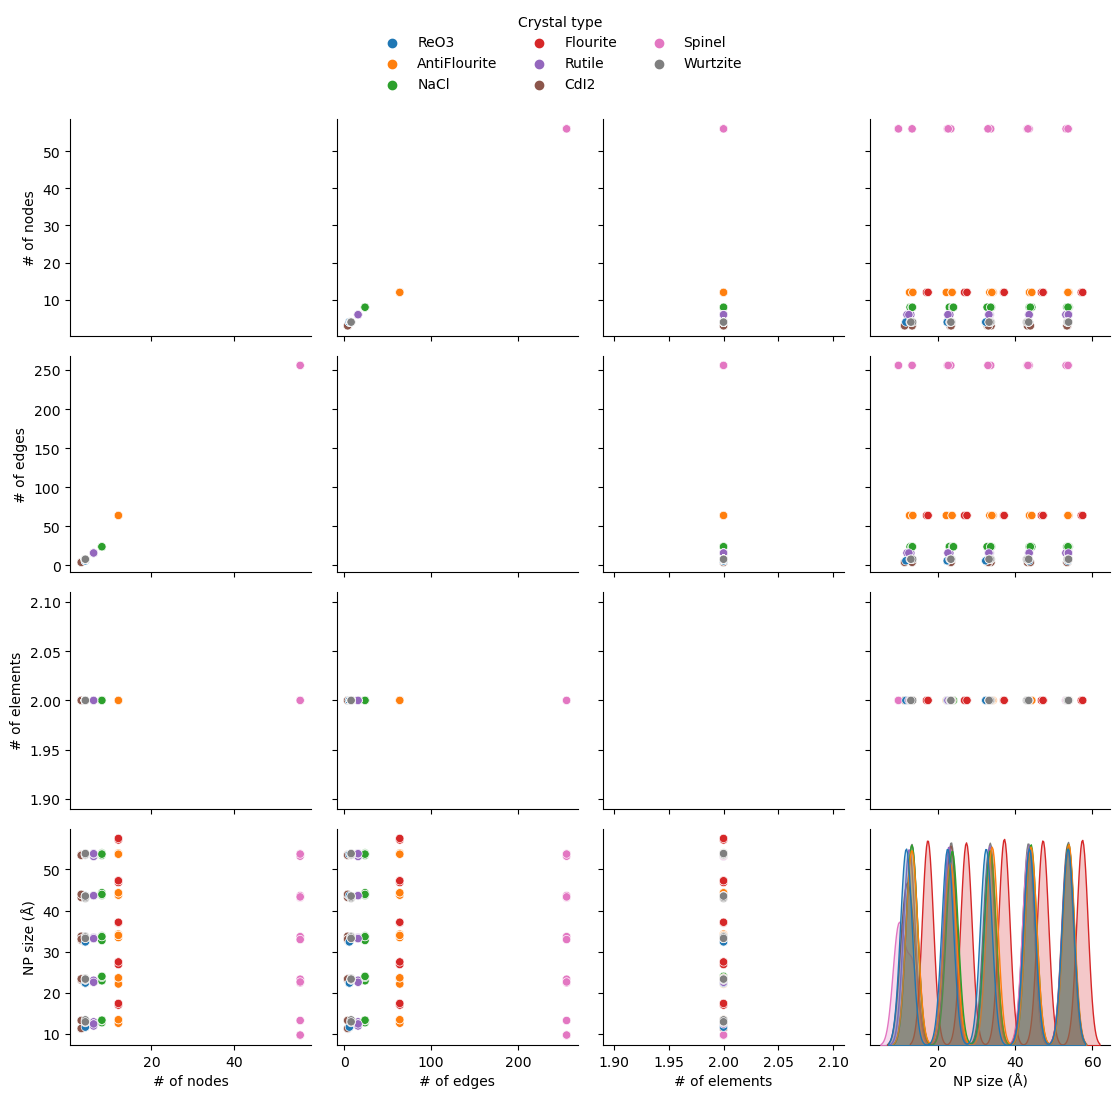

In [69]:
ax = sns.pairplot(data=stats, hue='Crystal type', diag_kws=dict(bw_method=0.1))
sns.move_legend(ax, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3)
plt.tight_layout()
# plt.savefig('./test_stats_pairplot.png', format='png', dpi=300)
plt.show()

In [ ]:
import Code.cifCleaning as cc
import pandas as pd

df = cc.cif_cleaning_pipeline('./Dataset/CIFs/ICSD_MonoMetalOxides/', remove_duplicates=True, unwanted_atoms=None, chunksize=1000)